In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Grab some data on transistor size/count

https://en.wikipedia.org/wiki/Transistor_count

In [2]:
from wikitables import import_tables
tables = import_tables('Transistor_count')

## Parse it (ignore this if you wish)

This grabs the data from the Wikipedia article.

In [3]:
def getfloat(value):
  try:
    return float(value)
  except ValueError:
    return 0.0

table = tables[0]

years = [r['Date of introduction'].value for r in table.rows]
process = [r['Process'].value for r in table.rows]
process = [getfloat(p.split()[0].replace(',','')) if p != '' else 0 for p in process]
count = [r['Transistor count'].value for r in table.rows]
count = [c if type(c) is int else float(c.split()[0].replace(',','')) for c in count]

years = np.array(years)
process = np.array(process)
count = np.array(count)

I = np.where(process!=0)[0]
years = years[I]
process = process[I]
count = count[I]

# Let's plot it!

## Is this the *best* way to display the data?
## What would you change?

Text(0,0.5,'nm')

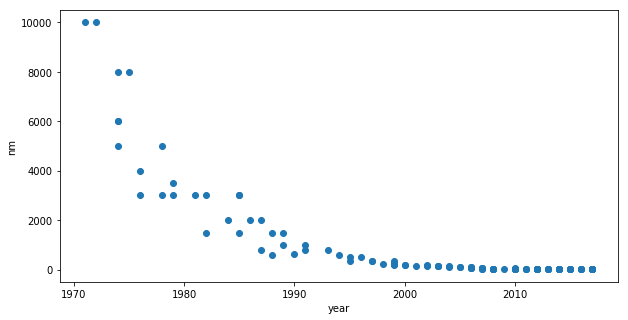

In [4]:
plt.figure(figsize=(10,5))
plt.plot(years, process, 'o')
plt.xlabel('year')
plt.ylabel('nm')

Text(0,0.5,'count')

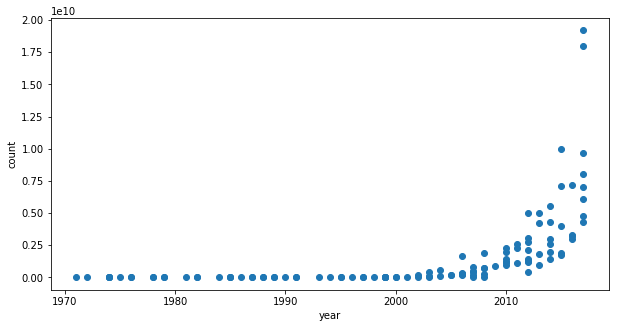

In [5]:
plt.figure(figsize=(10,5))
plt.plot(years, count, 'o') #, basey=2)
plt.xlabel('year')
plt.ylabel('count')

##  Add a slope line
see `polyfit`

Text(0,0.5,'count')

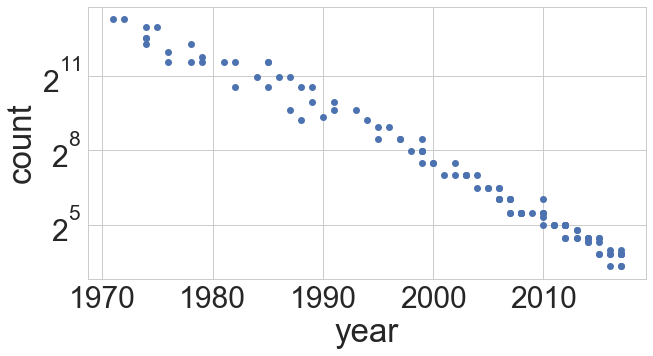

In [12]:
plt.figure(figsize=(10,5))
plt.semilogy(years, process, 'o', basey=2)
plt.xlabel('year')
plt.ylabel('count')

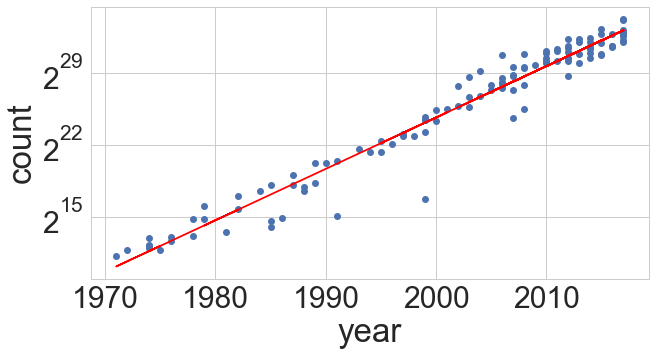

In [11]:
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), 'r-')
#print(1 / p[0])

## Make it look nice ... with Seaborn

2.00623494139


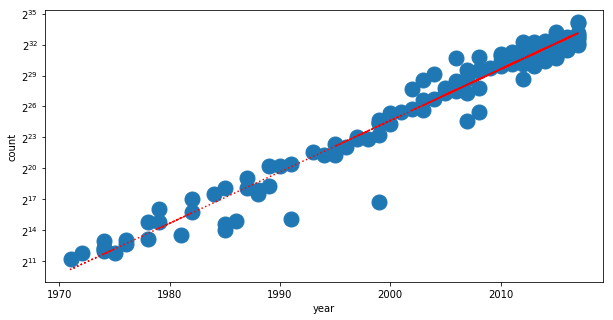

In [7]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])

## increase the font, make a light background

2.00623494139


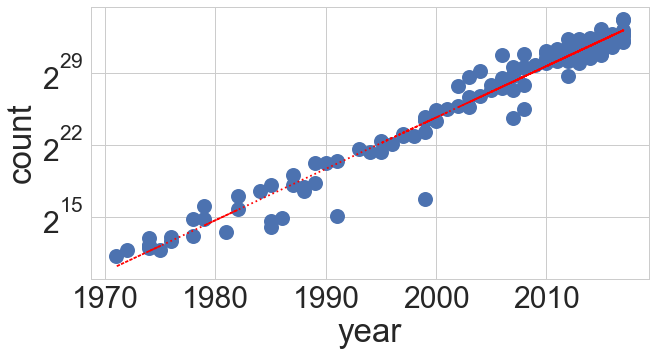

In [8]:
import seaborn as sns
sns.set(font_scale=3)
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])

## Reset the tick marks

[  8.00000000e+00   1.02400000e+03   1.31072000e+05   1.67772160e+07
   2.14748365e+09   2.74877907e+11   3.51843721e+13]
2.00623494139


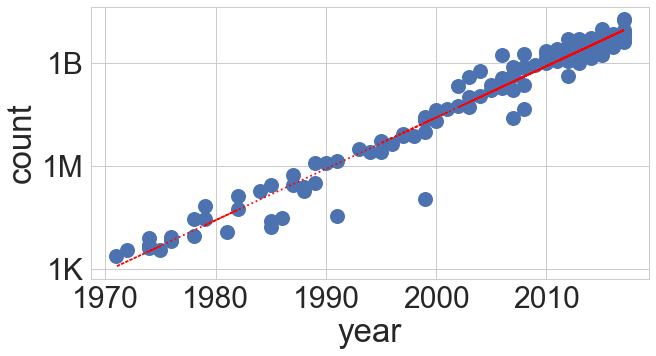

In [9]:
import seaborn as sns
sns.set(font_scale=3)
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

torig = plt.gca().get_yticks()
print(torig)
tnew = [1, 1000, np.int(1e6), np.int(1e9)]
tnewlabel = ['1', '1K', '1M', '1B']
plt.yticks(tnew, tnewlabel)


p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])